In [30]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import cvxpy as cp

Load simulated portfolio return data


In [31]:
df = pd.read_csv('portfolio_data.csv', parse_dates=['date'])

Pivot to get daily return matrix

In [32]:

pivot = df.pivot(index='date', columns='vertical', values='daily_return').dropna()
returns = pivot.to_numpy()
tickers = pivot.columns.tolist()

Estimate mean and covariance


In [33]:
mu = np.mean(returns, axis=0)
cov = np.cov(returns.T)

Portfolio Optimization using Sharpe Ratio

In [34]:
n = len(tickers)
w = cp.Variable(n)
risk_free_rate = 0.0001

Sharpe Ratio Objective

In [37]:
target_return = 0.0005
objective = cp.Minimize(cp.quad_form(w, cov))

constraints = [
    cp.sum(w) == 1,
    w >= 0,
    mu @ w >= target_return
]

prob = cp.Problem(objective, constraints)
prob.solve()

np.float64(1.4427311367654766e-05)

Results

In [38]:

print("Optimal Weights:")
for t, weight in zip(tickers, w.value.round(4)):
    print(f"{t}: {weight}")

print(f"Max Sharpe Ratio: {prob.value:.4f}")

Optimal Weights:
Energy: 0.163
Finance: 0.216
Pharma: 0.1322
Real Estate: 0.1782
Retail: 0.1395
Tech: 0.1711
Max Sharpe Ratio: 0.0000


Plot

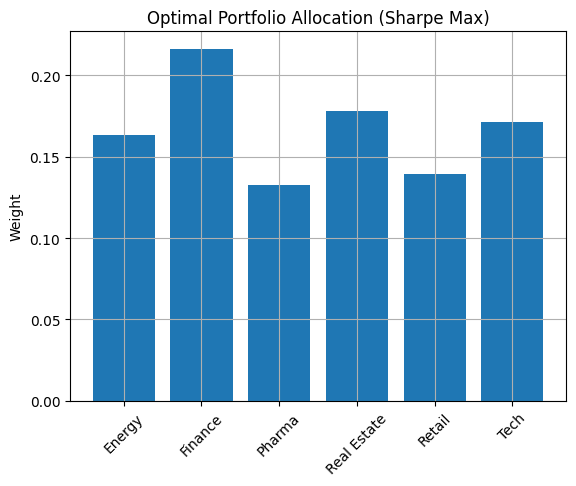

In [39]:
plt.bar(tickers, w.value)
plt.title("Optimal Portfolio Allocation (Sharpe Max)")
plt.ylabel("Weight")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [40]:
risk_free_rate = 0.0001
portfolio_return = mu @ w.value
portfolio_vol = np.sqrt(w.value.T @ cov @ w.value)
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_vol

print(f"Sharpe Ratio of Optimized Portfolio: {sharpe_ratio:.4f}")


Sharpe Ratio of Optimized Portfolio: 0.2092


In [41]:
print(f"Sharpe Ratio of Optimized Portfolio: {sharpe_ratio:.4f}")


Sharpe Ratio of Optimized Portfolio: 0.2092
